In [80]:
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv('Datasets/KDDTrain+_20Percent.csv')
data.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,...,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack_type,difficulty_level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [82]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Duration                     25191 non-null  int64  
 1   Protocol_type                25191 non-null  object 
 2   Service                      25191 non-null  object 
 3   Flag                         25191 non-null  object 
 4   Src_bytes                    25191 non-null  int64  
 5   Dst_bytes                    25191 non-null  int64  
 6   Land                         25191 non-null  int64  
 7   Wrong_fragment               25191 non-null  int64  
 8   Urgent                       25191 non-null  int64  
 9   Hot                          25191 non-null  int64  
 10  Num_failed_logins            25191 non-null  int64  
 11  Logged_in                    25191 non-null  int64  
 12  Num_compromised              25191 non-null  int64  
 13  Root_shell      

# EDA

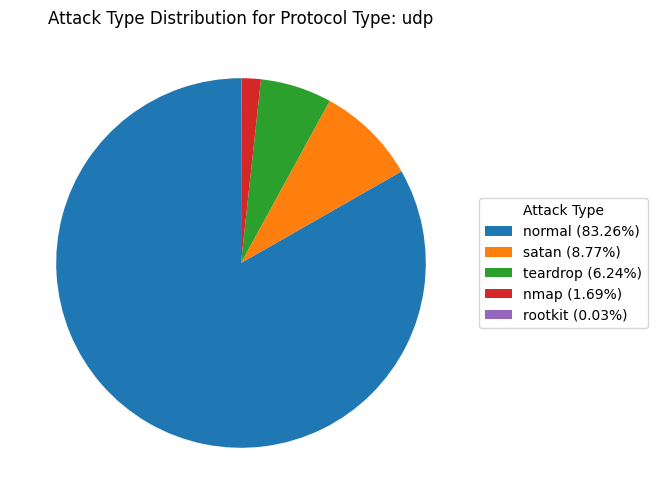

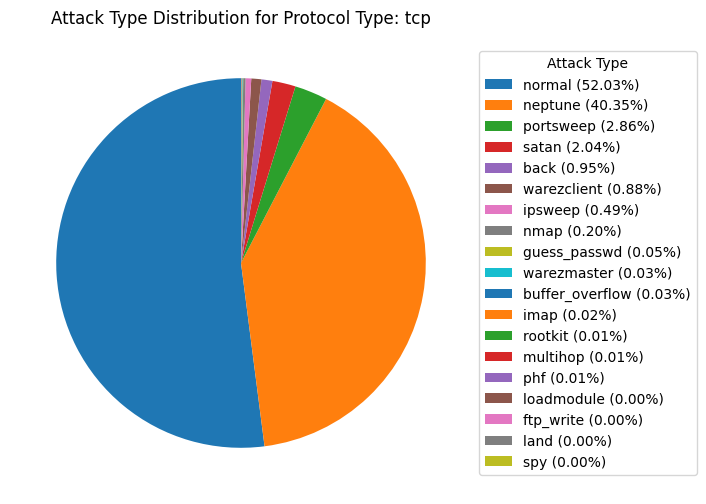

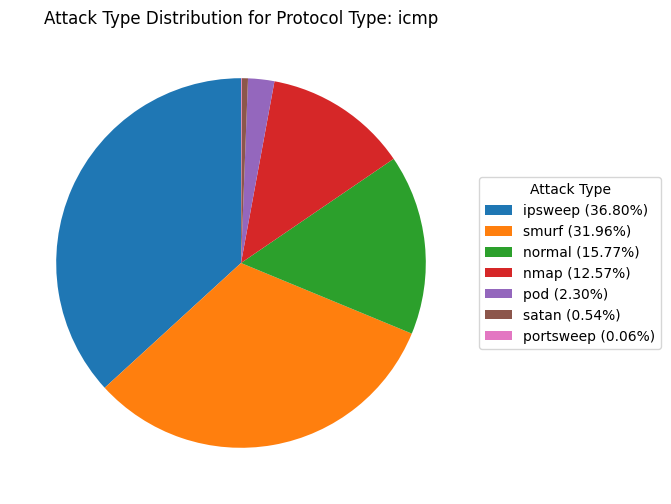

In [83]:
unique_protocols = data['Protocol_type'].unique()

# Create a pie chart for each protocol type
for protocol in unique_protocols:
    protocol_data = data[data['Protocol_type'] == protocol]
    attack_type_counts = protocol_data['attack_type'].value_counts()
    
    # Calculate percentages
    total_attacks = len(protocol_data)
    percentages = [f'{attack} ({(count / total_attacks * 100):.2f}%)' for attack, count in attack_type_counts.items()]
    
    # Plot the pie chart without percentages
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(attack_type_counts, labels=None, autopct='', startangle=90)
    plt.title(f'Attack Type Distribution for Protocol Type: {protocol}')
    
    # Add a legend with percentages
    plt.legend(wedges, percentages, title='Attack Type', loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

# Encoding

In [84]:
#Service - Destination network service used
print(data['Service'].unique())

['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']


In [85]:
#Flag - Status of the connection: Normal or Error
print(data['Flag'].unique())

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


In [86]:
#Protocol Type - Protocol used in the connection
print(data['Protocol_type'].unique())

['udp' 'tcp' 'icmp']


In [87]:
one_hot_features = ['Protocol_type', 'Flag', 'Service']
data = pd.get_dummies(data, columns=one_hot_features)
data.head()


,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,...,Service_systat,Service_telnet,Service_tim_i,Service_time,Service_urh_i,Service_urp_i,Service_uucp,Service_uucp_path,Service_vmnet,Service_whois
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
print(data['attack_type'].unique())

['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy']


In [89]:
#Mapping all attack types to their categories
dos_attacks = ['back','land','neptune','pod','smurf','teardrop', 'Apache2', 'udpstorm', 'Processtable', 'worm']
probe_attacks = ['satan', 'ipsweep', 'nmap', 'portsweep', 'Mscan', 'Saint']
R2L_attacks = ['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster', 'warezclient', 'spy', 'Xlock', 'Xsnoop', 'Snmpguess', 'Snmpgetattack', 'Httptunnel', 'Sendmail', 'Named']
U2R_attacks = ['rootkit', 'buffer_overflow', 'loadmodule', 'Perl', 'Sqlattack', 'Xterm', 'Ps']

def attack_category(attack):
    if attack in dos_attacks:
        attack_type = 1
    elif attack in probe_attacks:
        attack_type = 2
    elif attack in R2L_attacks:
        attack_type = 3
    elif attack in U2R_attacks:
        attack_type = 4
    else:
        attack_type = 0
    return attack_type

data['attack_category'] = data['attack_type'].apply(attack_category)

In [90]:
data.head()

,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,...,Service_telnet,Service_tim_i,Service_time,Service_urh_i,Service_urp_i,Service_uucp,Service_uucp_path,Service_vmnet,Service_whois,attack_category
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
